<a href="https://colab.research.google.com/github/YousraAshour/Stock-Market-Prediction-using-Numerical-Textual-Analysis/blob/main/Ethereum_stock_market_prediction_using_numerical_textual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Stock to be predicted is a cryptocurrency **Ethereum (ETH-USD)**

> Time Series data source [Yahoo Finance](https://finance.yahoo.com/quote/ETH-USD?p=ETH-USD)


> Sentiment Analysis data source [Kaggle, A Million News Headline](https://www.kaggle.com/datasets/therohk/million-headlines?resource=download)



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

!pip install yfinance 
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
bse_traindata = yf.download('ETH-USD', start='2015-01-01', end='2020-07-06')
bse_predictdata = yf.download('ETH-USD', start='2020-07-06', end='2020-07-07')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
bse_traindata.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
bse_predictdata.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
bse_traindata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2017-11-09 to 2020-07-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       971 non-null    float64
 1   High       971 non-null    float64
 2   Low        971 non-null    float64
 3   Close      971 non-null    float64
 4   Adj Close  971 non-null    float64
 5   Volume     971 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 53.1 KB


In [6]:
bse_predictdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-07-06 to 2020-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2 non-null      float64
 1   High       2 non-null      float64
 2   Low        2 non-null      float64
 3   Close      2 non-null      float64
 4   Adj Close  2 non-null      float64
 5   Volume     2 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 112.0 bytes


In [7]:
bse_traindata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [8]:
bse_traindata.reset_index(inplace=True)
bse_predictdata.reset_index(inplace=True)

In [9]:
bse_traindata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
966,2020-07-02,231.288910,232.396881,225.461960,229.392197,229.392197,6212210566
967,2020-07-03,229.318954,229.629318,224.913971,225.387070,225.387070,5109032700
968,2020-07-04,225.288483,230.054138,225.133316,229.074112,229.074112,5228310135
969,2020-07-05,228.976196,229.856720,224.544495,227.664597,227.664597,5292172429
970,2020-07-06,227.685013,242.132706,227.029526,241.510223,241.510223,8782917553


In [10]:
bse_predictdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-06,227.685013,242.132706,227.029526,241.510223,241.510223,8782917553
1,2020-07-07,240.972595,242.681854,234.218658,239.075531,239.075531,6441497597


In [11]:
bse_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       971 non-null    datetime64[ns]
 1   Open       971 non-null    float64       
 2   High       971 non-null    float64       
 3   Low        971 non-null    float64       
 4   Close      971 non-null    float64       
 5   Adj Close  971 non-null    float64       
 6   Volume     971 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 53.2 KB


In [12]:
# bse_traindata['Date'] = pd.to_datetime(bse_traindata['Date'], format = '%Y%m%d')

In [13]:
# bse_traindata.info()

In [14]:
bse_predictdata_price=round(bse_predictdata['Low']+bse_predictdata['High']+bse_predictdata['Close']/3,3)
bse_predictdata_price

0    549.666
1    556.592
dtype: float64

In [15]:
def WeekMovingAvg(weeks, df):
  dateclose_data = pd.DataFrame({'Date': df['Date'], 'Close':df['Close']})
  dateclose_data.set_index('Date', inplace=True)
  days = weeks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['Movingavg'] = dateclose_data['Close'].rolling(window=days).mean().shift()
  return dateclose_data.dropna()

In [16]:
WeekMovingAvg(2,bse_traindata)

,Close,Movingavg
Date,,
2017-11-19,354.385986,324.136002
2017-11-20,366.730011,327.486200
2017-11-21,360.401001,334.233902
2017-11-22,380.652008,338.805902
2017-11-23,410.165985,346.080304
...,...,...
2020-07-02,229.392197,231.899059
2020-07-03,225.387070,230.584959
2020-07-04,229.074112,228.709451


# Moving Average for 4 weeks

In [17]:
data_fourweek=WeekMovingAvg(4,bse_traindata).reset_index()
data_fourweek

,Date,Close,Movingavg
0,2017-11-29,427.523010,373.973451
1,2017-11-30,447.114014,379.305402
2,2017-12-01,466.540009,386.698453
3,2017-12-02,463.449005,394.291403
4,2017-12-03,465.852997,402.068454
...,...,...,...
946,2020-07-02,229.392197,232.219212
947,2020-07-03,225.387070,231.814161
948,2020-07-04,229.074112,231.138072
949,2020-07-05,227.664597,230.886043


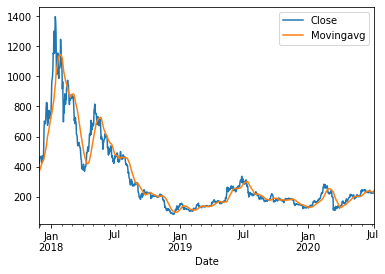

In [18]:
WeekMovingAvg(4,bse_traindata).plot()

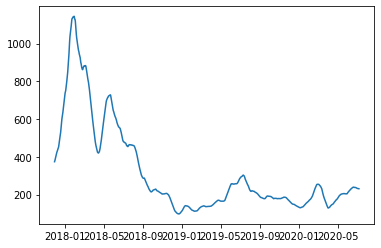

In [19]:
graph= plt.plot(data_fourweek['Date'],data_fourweek['Movingavg'])

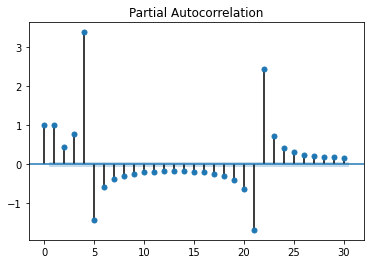

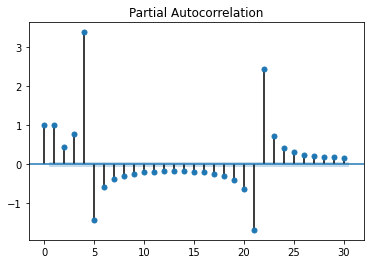

In [20]:
plotfourweek = data_fourweek.filter(['Date', 'Movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(data_fourweek['Date']))) 
del plotfourweek['Date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())


## Moving Average for 16 weeks

In [21]:
data_sixteenweek=WeekMovingAvg(16,bse_traindata).reset_index()
data_sixteenweek

,Date,Close,Movingavg
0,2018-01-28,1246.010010,722.447626
1,2018-01-29,1182.359985,734.011702
2,2018-01-30,1071.130005,745.050539
3,2018-01-31,1118.310059,754.506152
4,2018-02-01,1036.790039,764.636177
...,...,...,...
886,2020-07-02,229.392197,213.277785
887,2020-07-03,225.387070,214.191693
888,2020-07-04,229.074112,215.039077
889,2020-07-05,227.664597,215.986417


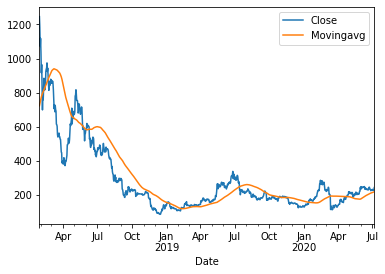

In [22]:
WeekMovingAvg(16,bse_traindata).plot()

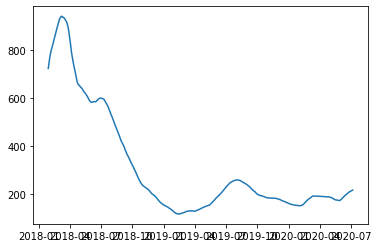

In [23]:
graph= plt.plot(data_sixteenweek['Date'],data_sixteenweek['Movingavg'])

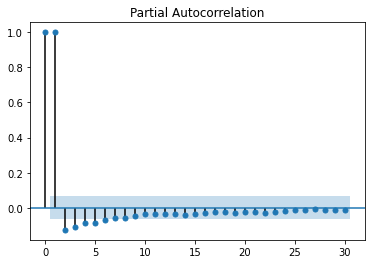

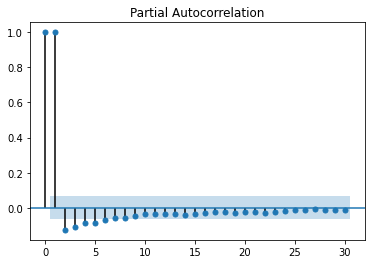

In [24]:
plotsixteenweek = data_sixteenweek.filter(['Date', 'Movingavg'], axis=1) #df.copy()
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(data_sixteenweek['Date']))) 
del plotsixteenweek['Date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())


## Moving Average for 52 weeks

In [25]:
data_52week=WeekMovingAvg(52,bse_traindata).reset_index()
data_52week

,Date,Close,Movingavg
0,2018-07-27,469.665985,656.231066
1,2018-07-28,466.898010,656.803304
2,2018-07-29,466.665009,657.448093
3,2018-07-30,457.080994,658.032647
4,2018-07-31,433.867004,658.606389
...,...,...,...
706,2020-07-02,229.392197,184.661431
707,2020-07-03,225.387070,184.866734
708,2020-07-04,229.074112,185.048882
709,2020-07-05,227.664597,185.262162


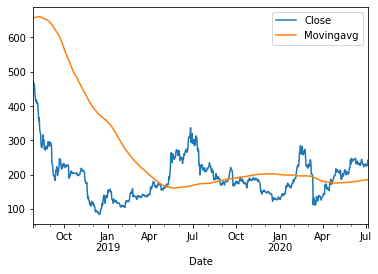

In [26]:
WeekMovingAvg(52,bse_traindata).plot()

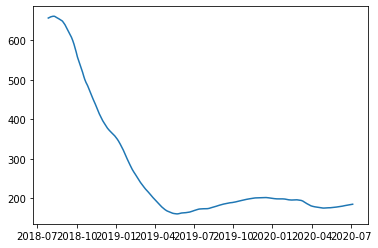

In [27]:
graph= plt.plot(data_52week['Date'],data_52week['Movingavg'])

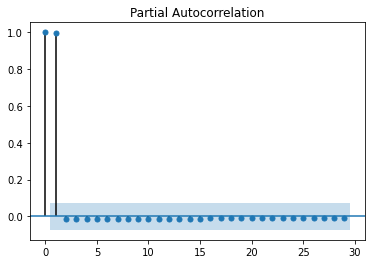

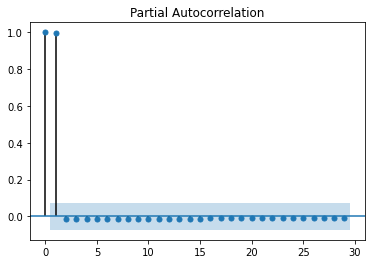

In [28]:
plot52week = data_52week.filter(['Date', 'Movingavg'], axis=1) #df.copy()
plot52week.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(data_52week['Date']))) 
del plot52week['Date']
sm.graphics.tsa.plot_pacf(plot52week.values.squeeze())


## Rolling Window for 10 and 50 days

In [29]:
def rollingwindow(days,df):
  data=df.filter(['Date','Open','High','Low','Close'],axis=1)
  data.set_index('Date', inplace=True)
  rolling_data=data.rolling(window=days).mean().shift()
  return rolling_data.dropna()


In [30]:
rollingwindow(10,bse_traindata).head()

,Open,High,Low,Close
Date,,,,
2017-11-19,319.993396,332.301898,313.071997,324.136002
2017-11-20,323.868997,336.485797,316.840396,327.486200
2017-11-21,327.211298,341.227698,322.715097,334.233902
2017-11-22,334.096997,346.529398,327.965198,338.805902
2017-11-23,338.659198,352.756097,334.128598,346.080304


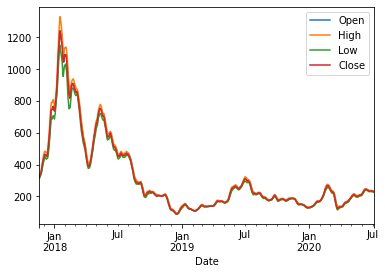

In [31]:
rollingwindow(10,bse_traindata).plot()

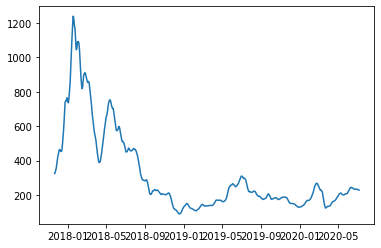

In [32]:
plt.plot(rollingwindow(10,bse_traindata).reset_index()['Date'],rollingwindow(10,bse_traindata)['Close'])

In [33]:
rollingwindow(50,bse_traindata).head()

,Open,High,Low,Close
Date,,,,
2017-12-29,511.260139,540.980239,486.966782,519.460242
2017-12-30,519.895018,549.793539,495.417821,528.114401
2017-12-31,528.557899,558.375479,503.231602,536.474482
2018-01-01,536.830418,567.193380,511.470142,545.315521
2018-01-02,545.651758,576.460920,520.339963,554.610181


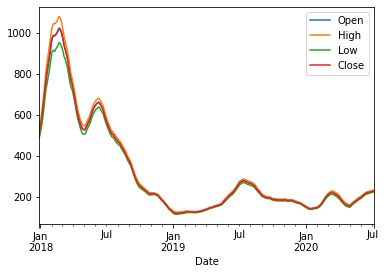

In [34]:
rollingwindow(50,bse_traindata).plot()

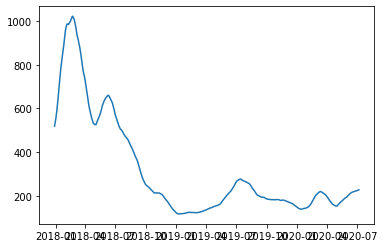

In [35]:
plt.plot(rollingwindow(50,bse_traindata).reset_index()['Date'],rollingwindow(50,bse_traindata)['Close'])

## Creating Dummy Time Series, 1 if volume is hgher than a certain percentage, else 0

In [36]:
def create_dummies(percentage,df):
  dummy_df=df.filter(['Date','Volume'], axis=1)
  # print('1')
  dummy_df.set_index('Date', inplace=True)
  # print('2')
  dummy_df['volumechng']=(dummy_df['Volume'].pct_change())*100

  dummy_df['dummies']= dummy_df['volumechng'].apply(lambda x : 1 if x >= percentage else 0)
  dummy_df.drop('Volume', axis = 1, inplace = True)

  return dummy_df.dropna()

In [37]:

create_dummies(10,bse_traindata)

,volumechng,dummies
Date,,
2017-11-10,-0.813210,0
2017-11-11,-4.930664,0
2017-11-12,91.556219,1
2017-11-13,-35.425910,0
2017-11-14,2.667270,0
...,...,...
2020-07-02,-3.891354,0
2020-07-03,-17.758218,0
2020-07-04,2.334638,0


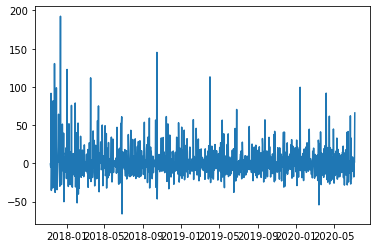

In [38]:
plt.plot(create_dummies(10,bse_traindata).reset_index()['Date'],create_dummies(10,bse_traindata)['volumechng'])

## Textual Analysis of news from Harvard Dataverse, A Million News Headlines

In [46]:
from google.colab import drive

drive.mount('/content/gdrive')

news= pd.read_csv('/content/gdrive/MyDrive/GRIP - Sparks/abcnews-date-text.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
news['publish_date']=pd.to_datetime(news['publish_date'], format='%Y%m%d')

In [64]:
news.columns

Index(['publish_date', 'headline_text'], dtype='object')

In [65]:
news.shape

(1244182, 2)

In [66]:
news.head()

,publish_date,headline_text
0,2003-02-19,a g calls for infrastructure protection summit
1,2003-02-19,aba decides against community broadcasting lic...
2,2003-02-19,act fire witnesses must be aware of defamation
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [67]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1244182 non-null  datetime64[ns]
 1   headline_text  1244182 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 19.0+ MB


In [68]:
news.tail()

,publish_date,headline_text
1244177,2021-12-31,two aged care residents die as state records 2...
1244178,2021-12-31,victoria records 5;919 new cases and seven deaths
1244179,2021-12-31,wa delays adopting new close contact definition
1244180,2021-12-31,western ringtail possums found badly dehydrate...
1244181,2021-12-31,what makes you a close covid contact here are ...


In [69]:
news['headline_text'].value_counts()


national rural news                                            983
abc sport                                                      718
abc weather                                                    714
abc business news and market analysis                          585
abc entertainment                                              551
                                                              ... 
rio drug gang used alligators to terrify slum                    1
research to identify women at risk of premature                  1
religious order defends sex abuse handling                       1
reigning champion federer advances to us semis                   1
what makes you a close covid contact here are the new rules      1
Name: headline_text, Length: 1213004, dtype: int64

In [70]:
news['headline_text'].value_counts().count()


1213004

In [71]:
news.isnull().sum().sum()


0

In [72]:
news.duplicated().sum()


0

In [73]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [74]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)


In [75]:
news.duplicated().sum()


0

In [76]:
from textblob import TextBlob


In [78]:
news['publish_date'].value_counts()

2012-08-24    384
2013-04-12    383
2011-02-22    380
2012-08-14    379
2013-05-14    378
             ... 
2021-06-05      6
2021-10-23      5
2021-05-15      5
2021-08-06      1
2017-02-09      1
Name: publish_date, Length: 6882, dtype: int64

In [84]:
lst = news['publish_date'].value_counts().index.tolist()


In [85]:
lst

[Timestamp('2012-08-24 00:00:00'),
 Timestamp('2013-04-12 00:00:00'),
 Timestamp('2011-02-22 00:00:00'),
 Timestamp('2012-08-14 00:00:00'),
 Timestamp('2013-05-14 00:00:00'),
 Timestamp('2012-10-17 00:00:00'),
 Timestamp('2013-04-16 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-10-23 00:00:00'),
 Timestamp('2013-03-15 00:00:00'),
 Timestamp('2013-03-28 00:00:00'),
 Timestamp('2012-10-18 00:00:00'),
 Timestamp('2012-07-25 00:00:00'),
 Timestamp('2013-04-23 00:00:00'),
 Timestamp('2012-10-11 00:00:00'),
 Timestamp('2012-08-09 00:00:00'),
 Timestamp('2012-08-02 00:00:00'),
 Timestamp('2013-05-07 00:00:00'),
 Timestamp('2012-11-21 00:00:00'),
 Timestamp('2012-03-14 00:00:00'),
 Timestamp('2013-05-20 00:00:00'),
 Timestamp('2013-04-11 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-05-29 00:00:00'),
 Timestamp('2012-11-14 00:00:00'),
 Timestamp('2012-11-29 00:00:00'),
 Timestamp('2012-08-07 00:00:00'),
 Timestamp('2013-03-21 00:00:00'),
 Timestamp('2013-03-

In [98]:
headlines=[]
for i in lst:
  df=news.loc[news['publish_date']== i]
  headline= ''
  headline=df['headline_text'].iloc[0]
  for x in range (1, len(df)):
    headline= headline+ ' . ' + df['headline_text'].iloc[x]
  headlines.append(headline)   



In [128]:
combined_df = pd.DataFrame({'publish_date': lst, 'headline_text' : new})
combined_df

,publish_date,headline_text
0,2012-08-24,13 year old charged with stabbing assault . 21...
1,2013-04-12,'bearcat' to assist police in hostile situatio...
2,2011-02-22,1m pledged to tackle muslim extremism . 30 kil...
3,2012-08-14,a good move that should have come sooner abbot...
4,2013-05-14,'ice' users on the rise; but alcohol tops the ...
...,...,...
6877,2021-06-05,australia talks survey finds demographic divid...
6878,2021-10-23,eddie obeid departs hunters hill mansion for p...
6879,2021-05-15,custom bike build for multiple amputee . first...
6880,2021-08-06,fortescue boss say keeping covid out of mine s...


In [129]:
combined_df.sort_values(by='publish_date',inplace=True, ignore_index=True )

In [130]:
combined_df

,publish_date,headline_text
0,2003-02-19,a g calls for infrastructure protection summit...
1,2003-02-20,15 dead in rebel bombing raid philippines army...
2,2003-02-21,accc too timid in petrol price investigations ...
3,2003-02-22,86 confirmed dead after us nightclub fire . ac...
4,2003-02-23,accused people smuggler to face darwin court ....
...,...,...
6877,2021-12-27,2021 ends as science centred year with covid 1...
6878,2021-12-28,8.7 million afghans faces emergency levels of ...
6879,2021-12-29,black jack sails in to hobart . black jack win...
6880,2021-12-30,40 million dollar rottnest redevelopment gets ...


In [131]:
polarity = []
subjectivity = []
for idx, row in combined_df.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [133]:
combined_df['polarity']= polarity
combined_df['subjectivity'] = subjectivity
combined_df

,publish_date,headline_text,polarity,subjectivity
0,2003-02-19,a g calls for infrastructure protection summit...,0.020692,0.306379
1,2003-02-20,15 dead in rebel bombing raid philippines army...,0.048356,0.352210
2,2003-02-21,accc too timid in petrol price investigations ...,0.020940,0.432369
3,2003-02-22,86 confirmed dead after us nightclub fire . ac...,0.085326,0.331419
4,2003-02-23,accused people smuggler to face darwin court ....,0.017982,0.353892
...,...,...,...,...
6877,2021-12-27,2021 ends as science centred year with covid 1...,-0.033333,0.313889
6878,2021-12-28,8.7 million afghans faces emergency levels of ...,0.104365,0.385137
6879,2021-12-29,black jack sails in to hobart . black jack win...,0.028232,0.382071
6880,2021-12-30,40 million dollar rottnest redevelopment gets ...,0.055303,0.369848


In [134]:
combined_df.isnull().sum().sum()


0

In [135]:
combined_df.rename(columns={'publish_date': 'Date'}, inplace = True)
combined_df

,Date,headline_text,polarity,subjectivity
0,2003-02-19,a g calls for infrastructure protection summit...,0.020692,0.306379
1,2003-02-20,15 dead in rebel bombing raid philippines army...,0.048356,0.352210
2,2003-02-21,accc too timid in petrol price investigations ...,0.020940,0.432369
3,2003-02-22,86 confirmed dead after us nightclub fire . ac...,0.085326,0.331419
4,2003-02-23,accused people smuggler to face darwin court ....,0.017982,0.353892
...,...,...,...,...
6877,2021-12-27,2021 ends as science centred year with covid 1...,-0.033333,0.313889
6878,2021-12-28,8.7 million afghans faces emergency levels of ...,0.104365,0.385137
6879,2021-12-29,black jack sails in to hobart . black jack win...,0.028232,0.382071
6880,2021-12-30,40 million dollar rottnest redevelopment gets ...,0.055303,0.369848


In [136]:
combined_df = combined_df.filter(['Date', 'polarity', 'subjectivity'], axis=1)
combined_df

,Date,polarity,subjectivity
0,2003-02-19,0.020692,0.306379
1,2003-02-20,0.048356,0.352210
2,2003-02-21,0.020940,0.432369
3,2003-02-22,0.085326,0.331419
4,2003-02-23,0.017982,0.353892
...,...,...,...
6877,2021-12-27,-0.033333,0.313889
6878,2021-12-28,0.104365,0.385137
6879,2021-12-29,0.028232,0.382071
6880,2021-12-30,0.055303,0.369848


In [138]:
combined_df['Date'].duplicated().sum()


0

In [139]:
bse_traindata.shape


(971, 7)

In [140]:
bse_traindata['Date'].duplicated().sum()


0

In [142]:
bse_data = pd.merge(bse_traindata, combined_df, how='left', on=['Date'])
bse_data

,Date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,0.041030,0.328501
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,0.042010,0.409672
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,0.150553,0.393704
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,0.100542,0.365228
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,-0.016100,0.356502
...,...,...,...,...,...,...,...,...,...
966,2020-07-02,231.288910,232.396881,225.461960,229.392197,229.392197,6212210566,0.050610,0.344660
967,2020-07-03,229.318954,229.629318,224.913971,225.387070,225.387070,5109032700,0.049322,0.404205
968,2020-07-04,225.288483,230.054138,225.133316,229.074112,229.074112,5228310135,0.025923,0.327654
969,2020-07-05,228.976196,229.856720,224.544495,227.664597,227.664597,5292172429,0.076296,0.287736


In [147]:
bse_data["month"] = bse_data['Date'].dt.month
bse_data["day"] = bse_data['Date'].dt.day
bse_data["dayofweek"] = bse_data['Date'].dt.dayofweek
bse_data["week"] = bse_data['Date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['Close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['Close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['Close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['Close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['Close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['Close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['Close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(create_dummies(10, bse_data).reset_index()['dummies'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['High'] + bse_data['Low'] + bse_data['Close']) / 3 , 2)
bse_data['close'] = round(bse_data['Close'] , 2)

In [148]:
bse_data.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'price', 'close'],
      dtype='object')

In [149]:
bse_data


,Date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity,month,...,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,price,close
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,0.04,0.33,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,319.13,320.88
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,0.04,0.41,11,...,320.88,320.88,320.88,320.88,320.88,320.88,320.88,0.0,306.17,299.25
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,0.15,0.39,11,...,310.07,310.07,310.07,310.07,310.07,310.07,310.07,1.0,310.78,314.68
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,0.10,0.37,11,...,311.61,311.61,311.61,311.61,311.61,311.61,311.61,0.0,308.52,307.91
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,-0.02,0.36,11,...,310.68,310.68,310.68,310.68,310.68,310.68,310.68,0.0,317.39,316.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2020-07-02,231.288910,232.396881,225.461960,229.392197,229.392197,6212210566,0.05,0.34,7,...,232.22,213.28,201.82,189.51,184.66,231.90,226.15,0.0,229.08,229.39
967,2020-07-03,229.318954,229.629318,224.913971,225.387070,225.387070,5109032700,0.05,0.40,7,...,231.81,214.19,201.54,189.94,184.87,230.58,226.76,0.0,226.64,225.39
968,2020-07-04,225.288483,230.054138,225.133316,229.074112,229.074112,5228310135,0.03,0.33,7,...,231.14,215.04,201.12,190.40,185.05,228.71,227.20,0.0,228.09,229.07
969,2020-07-05,228.976196,229.856720,224.544495,227.664597,227.664597,5292172429,0.08,0.29,7,...,230.89,215.99,200.87,190.93,185.26,228.04,227.87,1.0,227.36,227.66


In [153]:
bse_data.fillna(method = 'bfill', inplace = True)
bse_data.isnull().sum().sum()

1

In [155]:
bse_data.fillna(method = 'ffill', inplace = True)
bse_data.isnull().sum().sum()

0

In [157]:
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'polarity', 'subjectivity', 'price', 'close'], axis=1)
bse_data

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,price,close
0,11,9,3,45,320.88,320.88,320.88,320.88,320.88,320.88,320.88,0.0,0.04,0.33,319.13,320.88
1,11,10,4,45,320.88,320.88,320.88,320.88,320.88,320.88,320.88,0.0,0.04,0.41,306.17,299.25
2,11,11,5,45,310.07,310.07,310.07,310.07,310.07,310.07,310.07,1.0,0.15,0.39,310.78,314.68
3,11,12,6,45,311.61,311.61,311.61,311.61,311.61,311.61,311.61,0.0,0.10,0.37,308.52,307.91
4,11,13,0,46,310.68,310.68,310.68,310.68,310.68,310.68,310.68,0.0,-0.02,0.36,317.39,316.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,7,2,3,27,232.22,213.28,201.82,189.51,184.66,231.90,226.15,0.0,0.05,0.34,229.08,229.39
967,7,3,4,27,231.81,214.19,201.54,189.94,184.87,230.58,226.76,0.0,0.05,0.40,226.64,225.39
968,7,4,5,27,231.14,215.04,201.12,190.40,185.05,228.71,227.20,0.0,0.03,0.33,228.09,229.07
969,7,5,6,27,230.89,215.99,200.87,190.93,185.26,228.04,227.87,1.0,0.08,0.29,227.36,227.66


In [165]:
main_traindata = bse_data.iloc[:len(bse_data)-1,:].reset_index()  
newtest_data= bse_data.iloc[len(bse_data)-1:,:].reset_index()  

In [166]:
main_traindata

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,price,close
0,0,11,9,3,45,320.88,320.88,320.88,320.88,320.88,320.88,320.88,0.0,0.04,0.33,319.13,320.88
1,1,11,10,4,45,320.88,320.88,320.88,320.88,320.88,320.88,320.88,0.0,0.04,0.41,306.17,299.25
2,2,11,11,5,45,310.07,310.07,310.07,310.07,310.07,310.07,310.07,1.0,0.15,0.39,310.78,314.68
3,3,11,12,6,45,311.61,311.61,311.61,311.61,311.61,311.61,311.61,0.0,0.10,0.37,308.52,307.91
4,4,11,13,0,46,310.68,310.68,310.68,310.68,310.68,310.68,310.68,0.0,-0.02,0.36,317.39,316.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,965,7,1,2,27,232.25,212.40,202.06,189.07,184.47,231.69,225.32,0.0,0.08,0.38,229.57,231.11
966,966,7,2,3,27,232.22,213.28,201.82,189.51,184.66,231.90,226.15,0.0,0.05,0.34,229.08,229.39
967,967,7,3,4,27,231.81,214.19,201.54,189.94,184.87,230.58,226.76,0.0,0.05,0.40,226.64,225.39
968,968,7,4,5,27,231.14,215.04,201.12,190.40,185.05,228.71,227.20,0.0,0.03,0.33,228.09,229.07


In [167]:
newtest_data

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,price,close
0,970,7,6,0,28,230.77,216.68,200.64,191.41,185.47,227.51,228.41,1.0,0.04,0.42,236.89,241.51


In [168]:
X = main_traindata.drop(['price','close'], axis = 1)
y = main_traindata[['price','close']]

In [214]:
Xunseen = newtest_data.drop(['price','close'], axis = 1)
yunseen = newtest_data[['price','close']]

In [215]:
X.shape, y.shape


((970, 15), (970, 2))

In [216]:
Xunseen.shape , yunseen.shape

((1, 15), (1, 2))

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [218]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [219]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(criterion='mse',
                                                    max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

In [220]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])


In [221]:
r2_score(y_test, roundpred) 

0.9792433419604025

In [222]:
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))


MAE
15.940529595015583
MSE
1383.2058626168223
RMSE
37.19147567140651


In [223]:
pred_newtestunseen = chainedmodel.predict(Xunseen)
predicted_unseen=[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]
predicted_unseen

[229.56, 229.15]

In [224]:
yunseen= np.array(yunseen).tolist()[0]
yunseen

[236.89, 241.51]